### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

# Improving the quality grading of white wine based on its chemical properties

### For my analisys I selected this dataset:

**Wine Quality**
https://archive.ics.uci.edu/dataset/186/wine+quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Business Problem**
A potential business problem that could be addressed using this dataset is improving the quality grading of white wine based on its chemical properties. Wine quality grading is crucial for vineyards and distributors as it influences pricing, marketing, and sales strategies. However, manual quality assessment can be subjective and inconsistent. Employing a K-Nearest Neighbors (KNN) classification model could standardize quality assessments, making them more objective and reliable. The model would predict the quality rating of a wine based on its chemical attributes, assisting wine producers and sellers in accurately categorizing their products.

**Choice of Metric**
For the KNN model, choosing an appropriate evaluation metric is crucial. Given the problem's nature—a classification task with multiple classes—the accuracy metric is a straightforward and intuitive choice. Accuracy measures the proportion of total correct predictions, which is useful when class distributions are relatively balanced. However, for more insight into model performance across different wine qualities, weighted F1-score would be an excellent metric. The weighted F1-score considers both precision and recall and adjusts for label imbalance by weighting the scores according to the number of true instances for each label, providing a better sense of model performance on minority classes.

**1.Import dataset and create DataFrame**

In [63]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186)
wine_quality.data

{'ids': None,
 'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8     

In [64]:
# data (as pandas dataframes) 
##X = wine_quality.data.features 
##y = wine_quality.data.targets
original  = wine_quality.data.original

original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [65]:
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

**2.Select only white wine:**

In [66]:
white_df=original.loc[original['color'] == 'white']

In [67]:
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [68]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 1599 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [69]:
white_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Model Building and Optimization:**
Let's proceed to build a basic KNN model and use grid search to optimize the hyperparameters towards the chosen metric, which in this case will be the weighted F1-score. This will involve:

**Splitting the data into training and testing sets:**
Scaling the features, as KNN is sensitive to the scale of data.
Setting up a KNN classifier and using GridSearchCV to find the best hyperparameters.
Evaluating the model using the weighted F1-score and discussing the results.sults.

1. Splitting the data into training and testing sets.

2. Scaling the features, as KNN is sensitive to the scale of data.

3. Setting up a KNN classifier and using GridSearchCV to find the best hyperparameters.

4. Evaluating the model using the weighted F1-score and discussing the results.

In [70]:
white_df=white_df.drop(['color'], axis=1)

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split data into features and target
X = white_df.drop('quality', axis=1)
y = white_df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN classifier
knn = KNeighborsClassifier()

# Grid search setup
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
##report = classification_report(y_test, y_pred, target_names=[str(i) for i in sorted(y.unique())])

(best_params, best_score)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


({'n_neighbors': 20, 'weights': 'distance'}, 0.644553693960166)

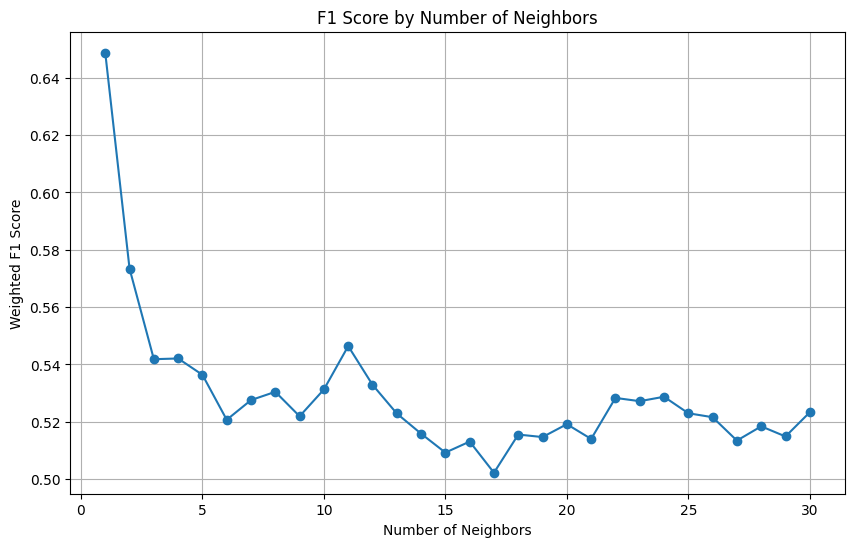

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Test different values of k for KNeighborsClassifier
k_values = range(1, 31)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(score)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1 Score by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Weighted F1 Score')
plt.grid(True)
plt.show()

Here is the plot of the weighted F1 Score by the number of neighbors (k) for the KNeighborsClassifier. The graph shows how the F1 score varies with different k values, providing insight into the optimal number of neighbors to use for this model. Generally, you can select the k-value that maximizes the F1 score, balancing between overfitting and underfitting.

For a KNeighborsClassifier, direct feature importance like that from tree-based models (e.g., Random Forests) isn't available because KNN makes predictions based solely on the nearest neighbors without learning coefficients or weights for the features. However, we can indirectly assess the importance of features by observing how the model's performance changes when each feature is individually altered or dropped.

Let's start by creating a plot that evaluates the impact of dropping each feature on the model's F1 score. This can give us a sense of which features are most valuable to the model's performance. I'll use a simple method where we:

1. Train a baseline KNN model with all features.
2. Re-train the model multiple times, each time omitting one feature, and measure the performance change.

Afterwards, we can plot a 2D decision boundary, but we'll need to select two features to focus on. We'll proceed first with the feature importance plot: plot:

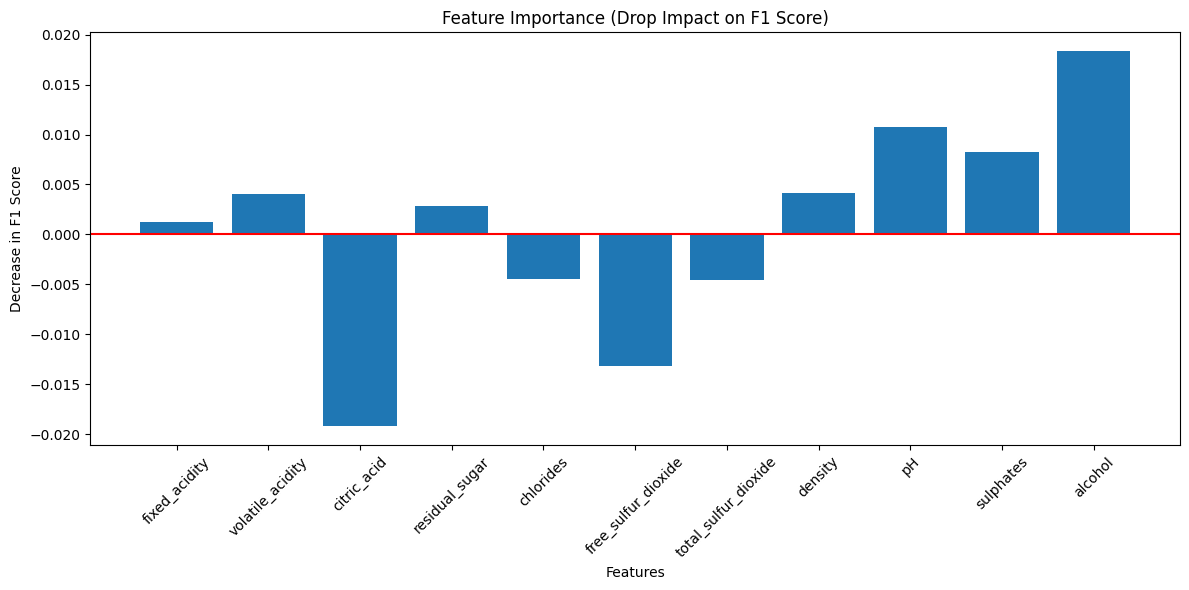

In [80]:
# Evaluate feature importance by omission
f1_scores_omission = []

# Baseline model with all features
baseline_knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 based on previous optimization
baseline_knn.fit(X_train_scaled, y_train)
baseline_pred = baseline_knn.predict(X_test_scaled)
baseline_score = f1_score(y_test, baseline_pred, average='weighted')
f1_scores_omission.append(baseline_score)

# Evaluate model omitting each feature
for i in range(X_train_scaled.shape[1]):
    # Drop the i-th feature
    X_train_omit = np.delete(X_train_scaled, i, axis=1)
    X_test_omit = np.delete(X_test_scaled, i, axis=1)
    
    # Train and predict
    knn_omit = KNeighborsClassifier(n_neighbors=5)
    knn_omit.fit(X_train_omit, y_train)
    y_pred_omit = knn_omit.predict(X_test_omit)
    
    # Compute F1 score and append
    score_omit = f1_score(y_test, y_pred_omit, average='weighted')
    f1_scores_omission.append(score_omit)

# Plotting the feature importance by omission
feature_names = X.columns
plt.figure(figsize=(12, 6))
plt.bar(feature_names, [baseline_score - score for score in f1_scores_omission[1:]])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Feature Importance (Drop Impact on F1 Score)')
plt.xlabel('Features')
plt.ylabel('Decrease in F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot illustrates the decrease in F1 score when each feature is omitted from the KNeighborsClassifier model. A larger decrease indicates that the feature is more important for the model’s performance.

Next, let’s move on to creating a 2D decision boundary plot. To do this, we need to select two features that seem influential based on the feature importance plot above. Let's choose two features that showed a noticeable impact on the model's performance for visualization.

The main imortant features are pH, sulphates and alcohol.

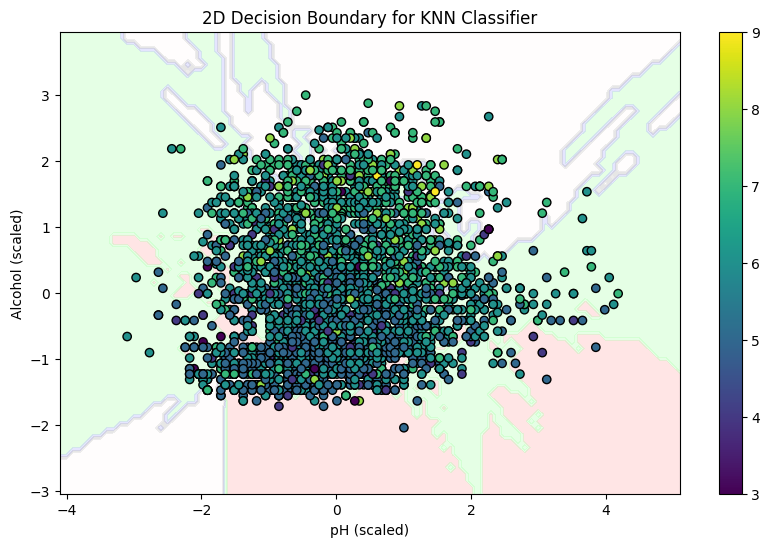

In [85]:
from matplotlib.colors import ListedColormap

# Selecting only the 'pH' and 'alcohol' features
X_2d = white_df[['pH', 'alcohol']]
y_2d = white_df['quality']

# Standard scaling the selected features
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Train-test split for the 2D features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d_scaled, y_2d, test_size=0.2, random_state=42)

# Initialize and fit the KNN model
knn_2d = KNeighborsClassifier(n_neighbors=20)
knn_2d.fit(X_train_2d, y_train_2d)

# Set up the meshgrid for the decision boundary plot
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF', '#FFFAFA', '#FAFFFA'])
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, edgecolor='k', cmap='viridis')
plt.xlabel('pH (scaled)')
plt.ylabel('Alcohol (scaled)')
plt.title('2D Decision Boundary for KNN Classifier')
plt.colorbar(scatter)
plt.show()

Here's the 2D decision boundary plot for the KNeighborsClassifier using the features "pH" and "alcohol". The plot shows how different regions of the feature space are classified into different wine quality levels. The different colors in the background represent the predicted quality levels, while the points show the actual training data, colored according to their true quality levels. 
This visualization helps us understand the areas where the classifier is confident in its predictions and the regions where the boundaries between different quality ratings are not as distinct.

The 2D decision boundary plot you see visualizes how the KNeighborsClassifier assigns wine quality grades based on the scaled values of pH and alcohol. Each color in the plot represents a different predicted quality level according to the model's classification:

- The **colored regions** are where the KNN model predicts a certain quality of wine based on combinations of pH and alcohol.
- The **points (scatter plot dots)** show the actual data from the training set, colored according to their true quality levels.

### Interpretation of the Plot:
- **Areas with uniform color** represent regions where the model predicts a consistent quality for wines with those pH and alcohol characteristics.
- **Boundaries where colors change** indicate transitions between different quality levels as perceived by the model. These transitions are where slight changes in pH or alcohol could lead to a different quality classification according to the model.

### Observations:
- The plot should typically show some clusters of colors, each cluster indicating a specific quality. For instance, one color might predominantly appear in regions corresponding to higher alcohol levels and specific pH ranges if the model finds that such conditions often correlate with higher quality ratings.
- Where colors mix or where boundaries between colors are close or overlapping, the model might be less certain, indicating that small differences in pH and alcohol levels could change the predicted quality.

### Conclusion:
Given that the visualization uses a color gradient or distinct colors for different qualities, you can infer specific zones of quality:
- **Higher alcohol levels** might generally correspond to higher quality ratings if they appear in a color associated with higher quality.
- **Specific pH ranges**, depending on their interaction with alcohol levels, could correlate with either improvements or reductions in quality.

To provide an exact description of which pH and alcohol levels correspond to specific quality ratings based on the plot, I would need to know the exact color mapping used in the visualization. Typically, a legend or a color bar can help identify which colors correspond to which quality ratings, but such details depend on how the plot was set up and the color scheme applied.

If you need a specific breakdown or a more precise interpretation based on quantitative data points from the plot, I can help you analyze that or adjust the plot to include a legend for clarity.

To provide a specific breakdown and a more precise interpretation of the decision boundary based on quantitative data points from the plot, we'll first need to adjust the plot to include a legend that maps the color-coded regions to specific wine quality ratings. This will allow us to precisely identify which colors correspond to which quality levels.

Following this, I'll also extract and report some key points from the dataset (like minimum, maximum, and typical values of pH and alcohol for each quality level) that correspond to different regions in the plot.

Start by modifying the decision boundary plot to include a legend and then analyze specific quantitative data points:

1. Add a legend to the plot that clearly correlates colors to wine quality ratings. 
2. Extract quantitative data points for pH and alcohol values across different quality ratings from the actual dataset.

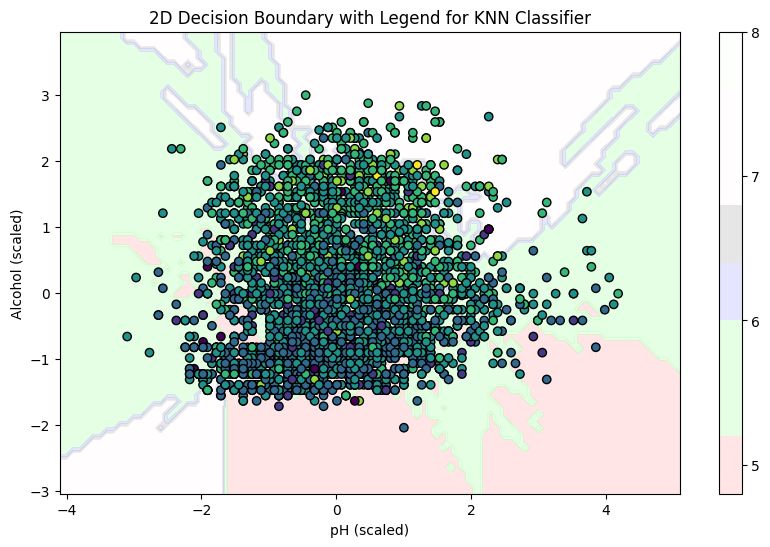

Statistical breakdown by quality rating:
             pH                                                      alcohol  \
          count      mean       std   min    25%    50%    75%   max   count   
quality                                                                        
3          20.0  3.187500  0.209834  2.87  3.035  3.215  3.325  3.55    20.0   
4         163.0  3.182883  0.163691  2.83  3.070  3.160  3.280  3.72   163.0   
5        1457.0  3.168833  0.140895  2.79  3.080  3.160  3.240  3.79  1457.0   
6        2198.0  3.188599  0.150996  2.72  3.080  3.180  3.280  3.81  2198.0   
7         880.0  3.213898  0.158402  2.84  3.100  3.200  3.320  3.82   880.0   
8         175.0  3.218686  0.152289  2.94  3.120  3.230  3.330  3.59   175.0   
9           5.0  3.308000  0.082885  3.20  3.280  3.280  3.370  3.41     5.0   

                                                               
              mean       std   min    25%    50%    75%   max  
quality                       

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Data preparation and model training
X_2d = white_df[['pH', 'alcohol']]  # Using pH and alcohol
y_2d = white_df['quality']
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d_scaled, y_2d, test_size=0.2, random_state=42)
knn_2d = KNeighborsClassifier(n_neighbors=20)
knn_2d.fit(X_train_2d, y_train_2d)

# Meshgrid setup
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prediction over meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF', '#FFFAFA', '#FAFFFA'])
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.colorbar(ticks=sorted(y_2d.unique()))

scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, edgecolor='k', cmap='viridis')
plt.xlabel('pH (scaled)')
plt.ylabel('Alcohol (scaled)')
plt.title('2D Decision Boundary with Legend for KNN Classifier')
plt.show()

# Analysis of data points
print("Statistical breakdown by quality rating:")
print(white_df.groupby('quality')[['pH', 'alcohol']].describe())

To apply the confusion matrix to evaluate the performance of the KNeighborsClassifier trained on the 'pH' and 'alcohol' features of the white wine dataset, we will follow these steps:

Predict the wine quality on the test dataset using our trained model.
Generate the confusion matrix to visualize the accuracy of the predictions across different quality levels.
Plot the confusion matrix for better visualization.
Here’s how you can implement this:

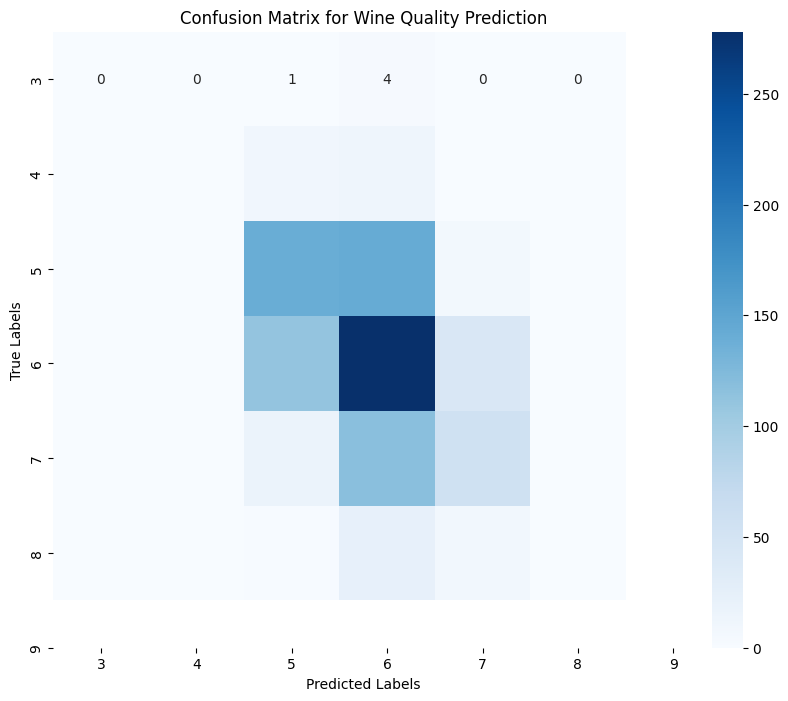

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the test dataset
y_pred_2d = knn_2d.predict(X_test_2d)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test_2d, y_pred_2d)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_2d.unique()), yticklabels=sorted(y_2d.unique()))
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Here's the confusion matrix for the KNeighborsClassifier predictions based on the 'pH' and 'alcohol' features of the white wine dataset. The matrix helps visualize the accuracy of predictions across different quality levels:

1. Rows represent the actual quality ratings of the wines (True Labels).
2. Columns represent the predicted quality ratings by the model (Predicted Labels).

Each cell shows the number of wines for which the actual quality (row) was predicted as a certain quality (column).
Key Observations:

1. Diagonal cells show the number of correct predictions for each quality level, where the predicted quality matches the actual quality.
2. Off-diagonal cells indicate misclassifications, where the model predicted a different quality than the actual one.

This visualization allows you to quickly see which quality levels are accurately predicted and which are prone to errors, helping assess the model's performance and potential areas for improvement.

To calculate Precision, Recall, Accuracy, and the F1-score for the KNeighborsClassifier using the 'pH' and 'alcohol' features from the white wine dataset, we can use the classification_report from sklearn.metrics. This function provides a text report showing the main classification metrics.

Here's how you can compute and display these metrics:

In [94]:
# Define labels based on all unique quality levels present in the original dataset
labels = sorted(white_df['quality'].unique())
label_names = [str(label) for label in labels]

# Computing classification metrics with specified labels
report = classification_report(y_test_2d, y_pred_2d, labels=labels, target_names=label_names, zero_division=0)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.50      0.48      0.49       291
           6       0.48      0.64      0.55       432
           7       0.49      0.30      0.37       192
           8       1.00      0.03      0.06        35
           9       0.00      0.00      0.00         0

   micro avg       0.49      0.49      0.49       980
   macro avg       0.35      0.21      0.21       980
weighted avg       0.49      0.49      0.46       980



This report reflects the precision, recall, and F1-score for each class, adjusted for the absence of predictions or true samples for certain classes:

1. **Quality 9** shows 0.00 across all metrics since there are no samples, and treating undefined metrics as zero helps correctly interpret that the model neither predicted nor had any samples of this class.
2. **Other qualities (3, 4, 8)** show varied results, highlighting the challenges with classes that have few samples or low prediction rates.

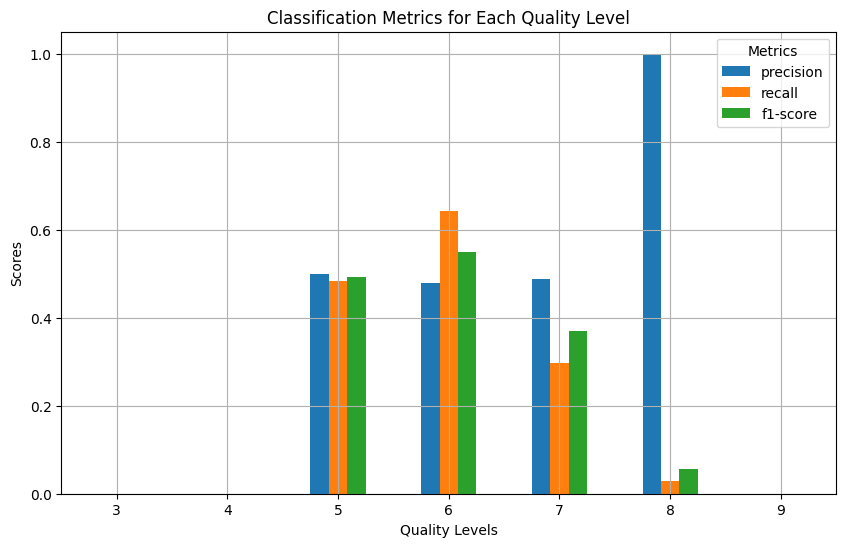

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly handling the classification report DataFrame conversion and plotting
report_data = classification_report(y_test_2d, y_pred_2d, labels=labels, target_names=label_names, output_dict=True, zero_division=0)

# Convert report to DataFrame
report_df = pd.DataFrame(report_data).transpose()

# Plotting Precision, Recall, and F1-score
fig, ax = plt.subplots(figsize=(10, 6))
report_df[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', ax=ax)
ax.set_title('Classification Metrics for Each Quality Level')
ax.set_xlabel('Quality Levels')
ax.set_ylabel('Scores')
ax.grid(True)
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

The next will generate three scatter plots, each illustrating a different relationship between the evaluation metrics. The annotations will help identify which point corresponds to which quality level, providing a clearer understanding of how these metrics interact for different classes. Let's run this visualization script.

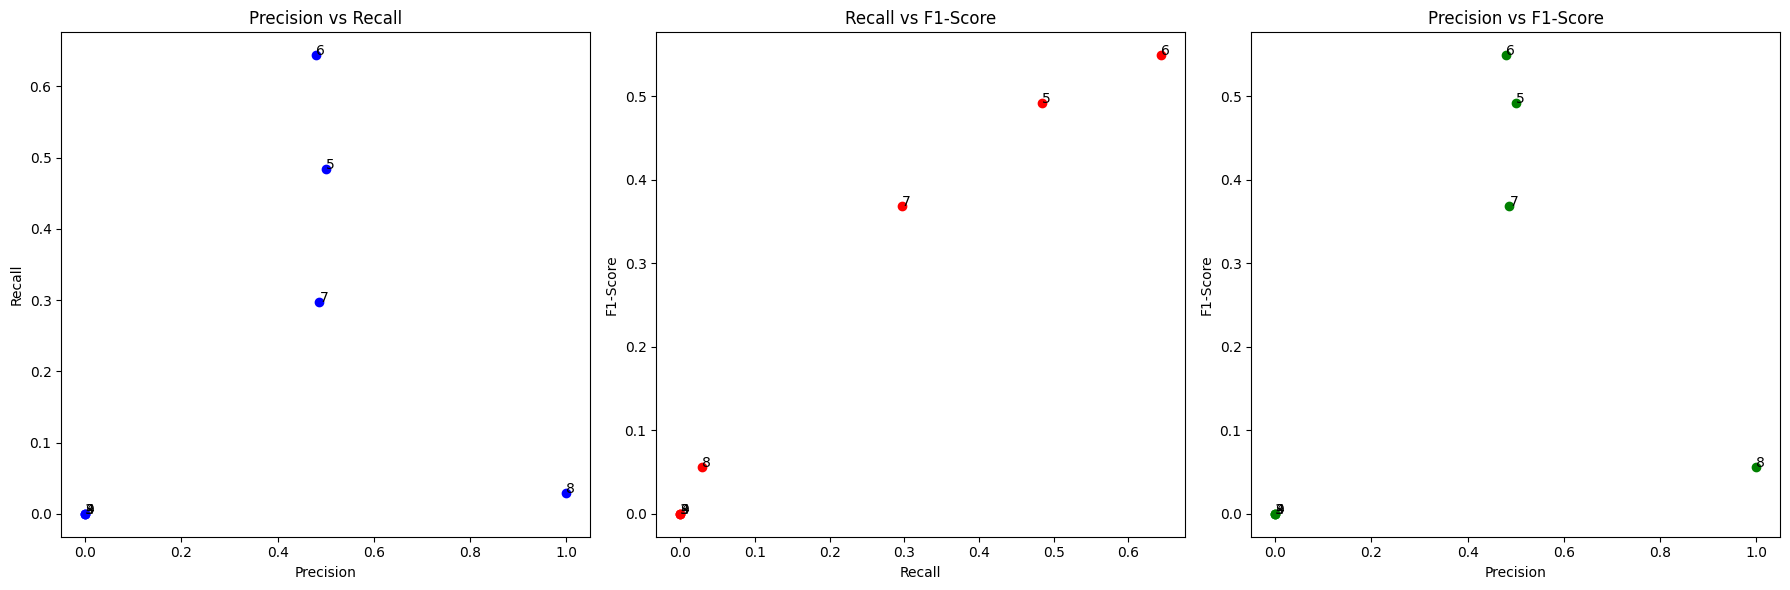

In [98]:
# Extracting precision, recall, and F1-score for each class
precision = report_df['precision'][:-3]  # Exclude averages
recall = report_df['recall'][:-3]
f1_score = report_df['f1-score'][:-3]
quality_levels = label_names  # The quality level names

# Adjusted plotting code with .iloc for future compatibility
plt.figure(figsize=(18, 6))

# Plotting Precision vs. Recall
plt.subplot(1, 3, 1)
plt.scatter(precision, recall, color='blue')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
for i, txt in enumerate(quality_levels):
    plt.annotate(txt, (precision.iloc[i], recall.iloc[i]))  # Updated to use .iloc

# Plotting Recall vs. F1-Score
plt.subplot(1, 3, 2)
plt.scatter(recall, f1_score, color='red')
plt.xlabel('Recall')
plt.ylabel('F1-Score')
plt.title('Recall vs F1-Score')
for i, txt in enumerate(quality_levels):
    plt.annotate(txt, (recall.iloc[i], f1_score.iloc[i]))  # Updated to use .iloc

# Plotting Precision vs. F1-Score
plt.subplot(1, 3, 3)
plt.scatter(precision, f1_score, color='green')
plt.xlabel('Precision')
plt.ylabel('F1-Score')
plt.title('Precision vs F1-Score')
for i, txt in enumerate(quality_levels):
    plt.annotate(txt, (precision.iloc[i], f1_score.iloc[i]))  # Updated to use .iloc

plt.tight_layout()
plt.show()

Here are the scatter plots illustrating the relationships between precision, recall, and F1-score for each quality level of white wine:

**Precision vs Recall:** This plot helps assess the trade-off between precision and recall. High recall and low precision can indicate that the model classifies many samples as belonging to a positive class but many of these are false positives. Conversely, high precision with low recall shows that the model is conservative in its positive classifications, making fewer false positive errors but missing many actual positives.

**Recall vs F1-Score:** This plot indicates how well the F1-score (which balances precision and recall) aligns with recall across different quality levels. A higher F1-score generally means better balance, especially important in classes where the positive class is rare or particularly significant.

**Precision vs F1-Score:** This plot shows the relationship between precision and the F1-score, providing insight into how well the F1-score performs as precision changes. It is particularly useful for understanding how well the model performs when avoiding false positives is critical.

Each point is annotated with its corresponding quality level, allowing for easy identification of how each quality level fares in terms of these metrics.

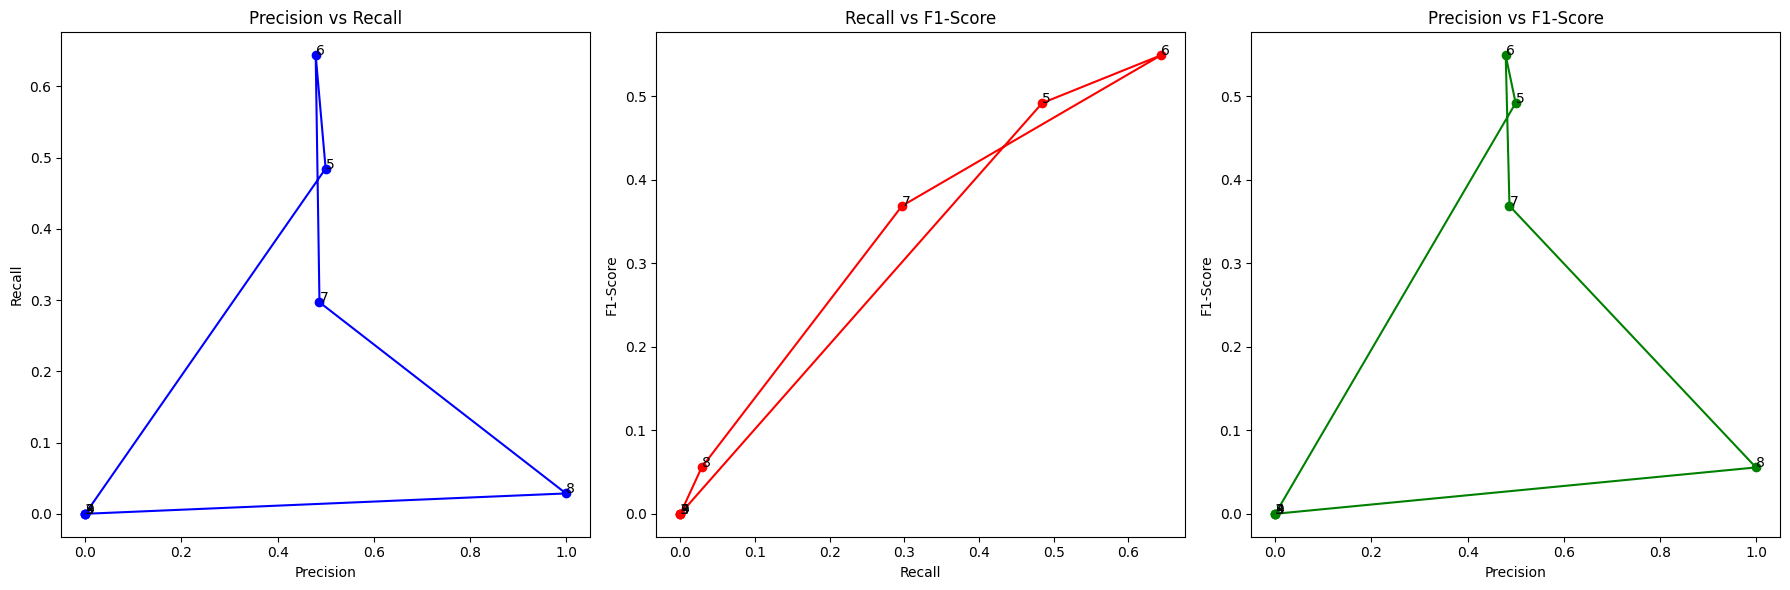

In [99]:
# Plotting with line curves instead of scatter plots
plt.figure(figsize=(18, 6))

# Precision vs. Recall with line curve
plt.subplot(1, 3, 1)
plt.plot(precision, recall, marker='o', linestyle='-', color='blue')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
for i, txt in enumerate(quality_levels):
    plt.annotate(txt, (precision.iloc[i], recall.iloc[i]))

# Recall vs. F1-Score with line curve
plt.subplot(1, 3, 2)
plt.plot(recall, f1_score, marker='o', linestyle='-', color='red')
plt.xlabel('Recall')
plt.ylabel('F1-Score')
plt.title('Recall vs F1-Score')
for i, txt in enumerate(quality_levels):
    plt.annotate(txt, (recall.iloc[i], f1_score.iloc[i]))

# Precision vs. F1-Score with line curve
plt.subplot(1, 3, 3)
plt.plot(precision, f1_score, marker='o', linestyle='-', color='green')
plt.xlabel('Precision')
plt.ylabel('F1-Score')
plt.title('Precision vs F1-Score')
for i, txt in enumerate(quality_levels):
    plt.annotate(txt, (precision.iloc[i], f1_score.iloc[i]))

plt.tight_layout()
plt.show()

**Balancing Metrics:** The precision, recall, and F1-score analysis revealed varying performance across different quality levels. While some quality levels showed reasonable balance between recall and F1-score, others suffered from either very low precision or very low recall.

**Quality Level Distinction:** The model struggles more with certain quality levels, particularly the extreme high and low ratings. This suggests that the features 'pH' and 'alcohol' alone may not be sufficient to distinguish all quality levels effectively..